In [1]:
%load_ext autoreload
%autoreload 2 

## Modules & Libraries

In [2]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as T

## Dataset Instance & Specifications

In [3]:
from data import *

In [4]:
transform = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

In [5]:
mode = 'train'
path = os.path.join(os.getcwd(), os.path.join('dataset', mode))

In [6]:
data = DigitMnistDataset(mode=mode, path=path, transform=transform)

## Labels Histogram

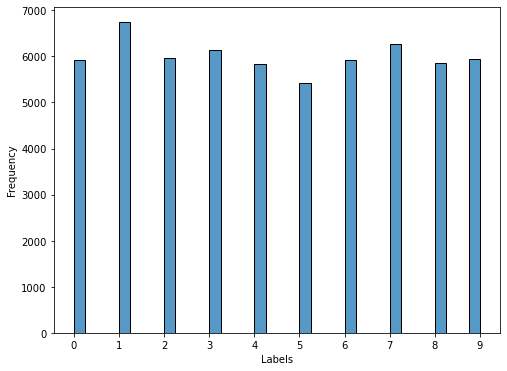

In [7]:
data.plot_label_distribution()

## Plot of Sample Images

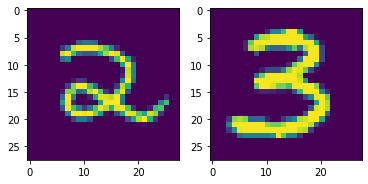

In [8]:
data.display_sample_images()

## Test Dataset Instance & Specifications


In [9]:
mode = 'test'
path = os.path.join(os.getcwd(), os.path.join('dataset', mode))

In [10]:
test_data = DigitMnistDataset(mode=mode, path=path, transform=transform)

## Plot of Sample Images from the Test Dataset

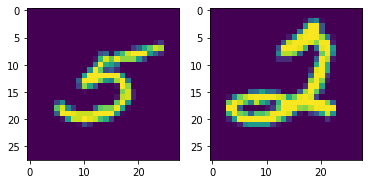

In [11]:
test_data.display_sample_images()

## Split into Training & Validation Data

In [12]:
from torch.utils.data import random_split

In [13]:
num_samples = len(data)
split_ratio = 0.8
num_train = int(num_samples * split_ratio)
num_val = num_samples - num_train

In [14]:
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_val}")

Number of training samples: 48000
Number of validation samples: 12000


In [15]:
train_data, val_data = random_split(data, [num_train, num_val])

## Data Loaders

In [16]:
from torch.utils.data import DataLoader

In [17]:
train_loader = DataLoader(train_data, batch_size = 2048, shuffle=True, num_workers=0, collate_fn=None,pin_memory=True)

In [18]:
validation_loader = DataLoader(val_data, batch_size = 8192, shuffle=True, num_workers=0, collate_fn=None,pin_memory=True)

In [19]:
test_loader = DataLoader(test_data, batch_size = 8192, shuffle=True, num_workers=0, collate_fn=None,pin_memory=True)

## Model instance & Specifications

In [20]:
from model import DigitRecognizer

In [21]:
in_channels = 1
num_classes = 10
bias =True
out_channels=2

In [22]:
model = DigitRecognizer(in_channels=in_channels, out_channels=out_channels, num_classes=num_classes, bias=bias)

In [23]:
model

DigitRecognizer(
  (model_list): ModuleList(
    (0): ModelLayer(
      (conv): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): ModelLayer(
      (conv): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (2): ModelLayer(
      (conv): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (3): ModelLayer(
      (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (4): ModelLayer(
      (conv): Conv2d(16, 10, kernel_size=(3, 3), stride=(1, 1))
      (bn): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True

In [24]:
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

Number of trainable parameters: 3090


## Training Specifications

In [25]:
learning_rate = 1e-2
weight_decay = 0.001
momentum = 0.9
epochs=45

## Optimizer

In [26]:
from torch.optim import AdamW, SGD

In [27]:
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, amsgrad=True)

## Learning Rate Scheduler

In [28]:
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

In [29]:
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

## Loss Function

In [30]:
from torch.nn import CrossEntropyLoss

In [31]:
criterion = CrossEntropyLoss(weight=None)


In [32]:
torch.backends.cudnn.benchmark = True

## Cuda Device

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
print(device)

cuda


## Training Loop

In [35]:
from train import *

In [36]:
total_loss, epoch_times, accuracies_train, accuracies_validation = train(model, optimizer, train_loader, validation_loader, criterion, epochs,scheduler=scheduler, device=device)

Current device: cuda


100%|██████████| 24/24 [00:22<00:00,  1.09it/s]

Evaluating epoch...


Epoch: 0 | Loss: 34.50 | Train acc: 69.34 | Val acc: 79.41 | Val_loss: 1.7765341401100159 | lr: 0.01 | Runtime: 26.74 seconds


100%|██████████| 24/24 [00:18<00:00,  1.31it/s]

Evaluating epoch...


Epoch: 1 | Loss: 9.33 | Train acc: 89.42 | Val acc: 93.47 | Val_loss: 0.42181359231472015 | lr: 0.01 | Runtime: 21.91 seconds


100%|██████████| 24/24 [00:18<00:00,  1.30it/s]

Evaluating epoch...


Epoch: 2 | Loss: 4.21 | Train acc: 94.60 | Val acc: 95.36 | Val_loss: 0.28009672462940216 | lr: 0.01 | Runtime: 21.95 seconds


100%|██████████| 24/24 [00:18<00:00,  1.30it/s]

Evaluating epoch...


Epoch: 3 | Loss: 3.06 | Train acc: 96.02 | Val acc: 96.37 | Val_loss: 0.24279827624559402 | lr: 0.01 | Runtime: 21.93 seconds


100%|██████████| 24/24 [00:18<00:00,  1.32it/s]

Evaluating epoch...


Epoch: 4 | Loss: 2.51 | Train acc: 96.70 | Val acc: 96.92 | Val_loss: 0.2026013657450676 | lr: 0.01 | Runtime: 21.90 seconds


100%|██████████| 24/24 [00:18<00:00,  1.32it/s]

Evaluating epoch...


Epoch: 5 | Loss: 2.25 | Train acc: 96.99 | Val acc: 97.28 | Val_loss: 0.1792299449443817 | lr: 0.01 | Runtime: 21.66 seconds


100%|██████████| 24/24 [00:18<00:00,  1.31it/s]

Evaluating epoch...


Epoch: 6 | Loss: 1.96 | Train acc: 97.40 | Val acc: 97.50 | Val_loss: 0.15242429077625275 | lr: 0.01 | Runtime: 21.94 seconds


100%|██████████| 24/24 [00:18<00:00,  1.30it/s]

Evaluating epoch...


Epoch: 7 | Loss: 1.83 | Train acc: 97.54 | Val acc: 97.58 | Val_loss: 0.1572236269712448 | lr: 0.01 | Runtime: 21.93 seconds


100%|██████████| 24/24 [00:18<00:00,  1.33it/s]

Evaluating epoch...


Epoch: 8 | Loss: 1.67 | Train acc: 97.80 | Val acc: 97.23 | Val_loss: 0.17836863547563553 | lr: 0.01 | Runtime: 21.59 seconds


100%|██████████| 24/24 [00:18<00:00,  1.32it/s]

Evaluating epoch...


Epoch: 9 | Loss: 1.61 | Train acc: 97.84 | Val acc: 97.70 | Val_loss: 0.13568202406167984 | lr: 0.01 | Runtime: 21.77 seconds


100%|██████████| 24/24 [00:18<00:00,  1.32it/s]

Evaluating epoch...


Epoch: 10 | Loss: 1.50 | Train acc: 98.00 | Val acc: 97.88 | Val_loss: 0.1322215050458908 | lr: 0.01 | Runtime: 21.75 seconds


100%|██████████| 24/24 [00:18<00:00,  1.32it/s]

Evaluating epoch...


Epoch: 11 | Loss: 1.39 | Train acc: 98.18 | Val acc: 98.03 | Val_loss: 0.11980253085494041 | lr: 0.01 | Runtime: 21.78 seconds


100%|██████████| 24/24 [00:18<00:00,  1.29it/s]

Evaluating epoch...


Epoch: 12 | Loss: 1.33 | Train acc: 98.24 | Val acc: 98.03 | Val_loss: 0.12745359912514687 | lr: 0.01 | Runtime: 22.09 seconds


100%|██████████| 24/24 [00:18<00:00,  1.33it/s]

Evaluating epoch...


Epoch: 13 | Loss: 1.23 | Train acc: 98.36 | Val acc: 97.99 | Val_loss: 0.1240566074848175 | lr: 0.01 | Runtime: 21.61 seconds


100%|██████████| 24/24 [00:19<00:00,  1.24it/s]

Evaluating epoch...


Epoch: 14 | Loss: 1.23 | Train acc: 98.39 | Val acc: 98.06 | Val_loss: 0.11792599409818649 | lr: 0.01 | Runtime: 23.43 seconds


100%|██████████| 24/24 [00:20<00:00,  1.19it/s]

Evaluating epoch...


Epoch: 15 | Loss: 1.17 | Train acc: 98.43 | Val acc: 98.13 | Val_loss: 0.11822294816374779 | lr: 0.01 | Runtime: 24.11 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 16 | Loss: 1.10 | Train acc: 98.48 | Val acc: 98.32 | Val_loss: 0.10825011506676674 | lr: 0.01 | Runtime: 23.79 seconds


100%|██████████| 24/24 [00:19<00:00,  1.22it/s]

Evaluating epoch...


Epoch: 17 | Loss: 1.03 | Train acc: 98.62 | Val acc: 98.28 | Val_loss: 0.1096467636525631 | lr: 0.01 | Runtime: 23.78 seconds


100%|██████████| 24/24 [00:19<00:00,  1.22it/s]

Evaluating epoch...


Epoch: 18 | Loss: 1.07 | Train acc: 98.57 | Val acc: 98.47 | Val_loss: 0.10522937402129173 | lr: 0.01 | Runtime: 23.87 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 19 | Loss: 1.00 | Train acc: 98.64 | Val acc: 98.29 | Val_loss: 0.09927867352962494 | lr: 0.01 | Runtime: 24.16 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 20 | Loss: 0.95 | Train acc: 98.71 | Val acc: 98.29 | Val_loss: 0.11381138861179352 | lr: 0.01 | Runtime: 23.78 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 21 | Loss: 0.90 | Train acc: 98.83 | Val acc: 98.44 | Val_loss: 0.09728525578975677 | lr: 0.01 | Runtime: 23.76 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 22 | Loss: 0.83 | Train acc: 98.92 | Val acc: 98.42 | Val_loss: 0.1080554947257042 | lr: 0.01 | Runtime: 23.93 seconds


100%|██████████| 24/24 [00:20<00:00,  1.19it/s]

Evaluating epoch...


Epoch: 23 | Loss: 0.88 | Train acc: 98.80 | Val acc: 98.49 | Val_loss: 0.0911383107304573 | lr: 0.01 | Runtime: 24.13 seconds


100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

Evaluating epoch...


Epoch: 24 | Loss: 0.86 | Train acc: 98.86 | Val acc: 98.15 | Val_loss: 0.11759795621037483 | lr: 0.01 | Runtime: 24.08 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 25 | Loss: 0.86 | Train acc: 98.86 | Val acc: 98.43 | Val_loss: 0.09699302911758423 | lr: 0.01 | Runtime: 23.96 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 26 | Loss: 0.75 | Train acc: 98.99 | Val acc: 98.15 | Val_loss: 0.11871330440044403 | lr: 0.01 | Runtime: 23.95 seconds


100%|██████████| 24/24 [00:20<00:00,  1.16it/s]

Evaluating epoch...


Epoch: 27 | Loss: 0.79 | Train acc: 98.90 | Val acc: 98.41 | Val_loss: 0.10765556246042252 | lr: 0.01 | Runtime: 24.96 seconds


100%|██████████| 24/24 [00:19<00:00,  1.20it/s]

Evaluating epoch...


Epoch: 28 | Loss: 0.77 | Train acc: 98.95 | Val acc: 98.53 | Val_loss: 0.09596749767661095 | lr: 0.01 | Runtime: 24.21 seconds


100%|██████████| 24/24 [00:20<00:00,  1.17it/s]

Evaluating epoch...


Epoch: 29 | Loss: 0.72 | Train acc: 99.05 | Val acc: 98.36 | Val_loss: 0.10856430605053902 | lr: 0.001 | Runtime: 24.50 seconds


100%|██████████| 24/24 [00:20<00:00,  1.19it/s]

Evaluating epoch...


Epoch: 30 | Loss: 0.60 | Train acc: 99.22 | Val acc: 98.64 | Val_loss: 0.0957331582903862 | lr: 0.001 | Runtime: 24.25 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 31 | Loss: 0.54 | Train acc: 99.35 | Val acc: 98.65 | Val_loss: 0.08911090716719627 | lr: 0.001 | Runtime: 23.79 seconds


100%|██████████| 24/24 [00:20<00:00,  1.20it/s]

Evaluating epoch...


Epoch: 32 | Loss: 0.53 | Train acc: 99.36 | Val acc: 98.58 | Val_loss: 0.09085242077708244 | lr: 0.001 | Runtime: 24.09 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 33 | Loss: 0.52 | Train acc: 99.37 | Val acc: 98.63 | Val_loss: 0.09028343111276627 | lr: 0.001 | Runtime: 23.93 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 34 | Loss: 0.53 | Train acc: 99.36 | Val acc: 98.63 | Val_loss: 0.09276413917541504 | lr: 0.001 | Runtime: 23.91 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 35 | Loss: 0.52 | Train acc: 99.35 | Val acc: 98.65 | Val_loss: 0.10343454405665398 | lr: 0.001 | Runtime: 23.98 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 36 | Loss: 0.52 | Train acc: 99.40 | Val acc: 98.60 | Val_loss: 0.09674643352627754 | lr: 0.001 | Runtime: 23.94 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 37 | Loss: 0.52 | Train acc: 99.37 | Val acc: 98.64 | Val_loss: 0.09330709278583527 | lr: 0.0001 | Runtime: 24.12 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 38 | Loss: 0.50 | Train acc: 99.40 | Val acc: 98.65 | Val_loss: 0.09555481001734734 | lr: 0.0001 | Runtime: 23.93 seconds


100%|██████████| 24/24 [00:19<00:00,  1.21it/s]

Evaluating epoch...


Epoch: 39 | Loss: 0.49 | Train acc: 99.42 | Val acc: 98.63 | Val_loss: 0.09011693298816681 | lr: 0.0001 | Runtime: 23.78 seconds


100%|██████████| 24/24 [00:20<00:00,  1.17it/s]

Evaluating epoch...


Epoch: 40 | Loss: 0.49 | Train acc: 99.42 | Val acc: 98.63 | Val_loss: 0.09688131511211395 | lr: 0.0001 | Runtime: 24.94 seconds


100%|██████████| 24/24 [00:20<00:00,  1.16it/s]

Evaluating epoch...


Epoch: 41 | Loss: 0.49 | Train acc: 99.43 | Val acc: 98.62 | Val_loss: 0.09037720412015915 | lr: 0.0001 | Runtime: 24.92 seconds


100%|██████████| 24/24 [00:21<00:00,  1.13it/s]

Evaluating epoch...


Epoch: 42 | Loss: 0.49 | Train acc: 99.42 | Val acc: 98.65 | Val_loss: 0.09186997637152672 | lr: 0.0001 | Runtime: 25.63 seconds


100%|██████████| 24/24 [00:20<00:00,  1.17it/s]

Evaluating epoch...


Epoch: 43 | Loss: 0.50 | Train acc: 99.42 | Val acc: 98.63 | Val_loss: 0.09338457882404327 | lr: 1e-05 | Runtime: 24.75 seconds


100%|██████████| 24/24 [00:21<00:00,  1.14it/s]

Evaluating epoch...


Epoch: 44 | Loss: 0.49 | Train acc: 99.44 | Val acc: 98.63 | Val_loss: 0.09481124579906464 | lr: 1e-05 | Runtime: 25.48 seconds


## Loss Plot

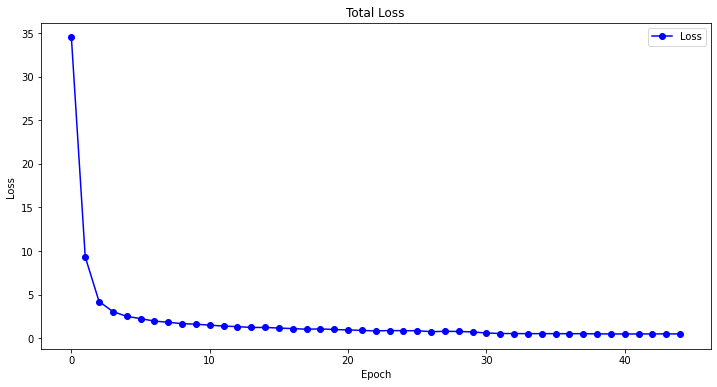

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), total_loss, 'bo-')
plt.legend(["Loss"], loc ="upper right")
plt.title('Total Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss ")
plt.show()

## Training Accracy VS Validation Accuracy Plot

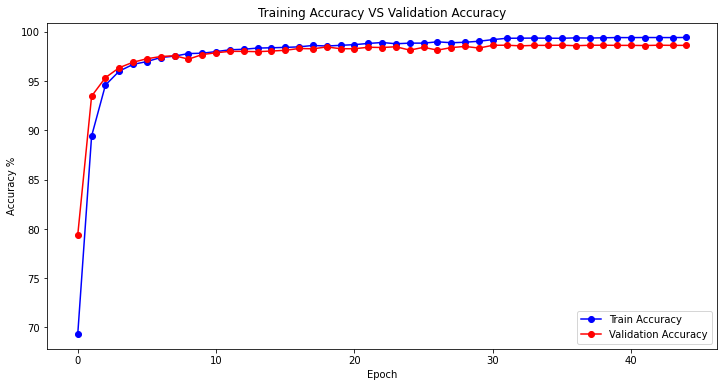

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), accuracies_train, 'bo-')
plt.plot(range(epochs), accuracies_validation, 'ro-')
plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.title('Training Accuracy VS Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.show()

## Predictions

In [39]:
from evaluate import *

In [40]:
test_acc, test_loss = evaluate(model, test_loader, criterion, device)

In [41]:
print(test_acc, test_loss)

98.72999572753906 0.07420645654201508


## Save the Model

In [42]:
 path = os.path.join(path, param_name)
    with open(path, 'wb') as file:
        torch.save({'model_state_dict': model.state_dict()}, file)


IndentationError: unexpected indent (1077977500.py, line 2)